# Program 7(b): K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#replace zero values with mean
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [4]:
X = df.iloc[:, [2, 5]].values

In [5]:
X

array([[72. , 33.6],
       [66. , 26.6],
       [64. , 23.3],
       ...,
       [72. , 26.2],
       [60. , 30.1],
       [70. , 30.4]])

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
print(wcss) 

[148849.05102917907, 78322.31387053363, 57242.17272903259, 46402.19053306981, 39082.57125187196, 33317.5476260845, 28188.24701720544, 24795.960661310746, 22551.697779560236, 20635.982935825603]


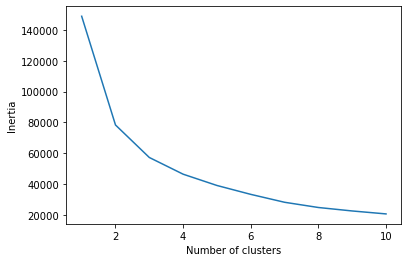

In [7]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

In [8]:

kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 23)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([1, 2, 2, 2, 3, 2, 3, 1, 2, 0, 0, 1, 4, 3, 2, 2, 0, 2, 3, 1, 0, 4,
       0, 4, 0, 2, 1, 2, 4, 0, 1, 4, 3, 4, 4, 3, 1, 4, 1, 1, 2, 4, 4, 0,
       2, 1, 3, 2, 1, 2, 4, 3, 2, 4, 2, 3, 1, 0, 4, 1, 2, 2, 2, 3, 2, 2,
       4, 0, 2, 4, 2, 2, 0, 4, 2, 3, 4, 1, 1, 2, 3, 2, 4, 2, 0, 2, 1, 1,
       1, 2, 3, 4, 1, 2, 4, 1, 3, 3, 3, 0, 1, 3, 4, 2, 1, 3, 0, 3, 3, 4,
       1, 3, 4, 3, 3, 4, 1, 3, 3, 2, 1, 2, 1, 4, 1, 3, 1, 3, 4, 4, 2, 3,
       2, 1, 2, 3, 2, 3, 4, 1, 2, 4, 3, 2, 3, 2, 4, 2, 4, 2, 1, 2, 4, 4,
       1, 0, 3, 3, 2, 1, 4, 1, 1, 2, 4, 2, 2, 2, 2, 4, 4, 1, 2, 1, 2, 2,
       4, 0, 1, 4, 4, 2, 2, 3, 2, 1, 2, 0, 2, 4, 2, 2, 2, 1, 3, 4, 3, 2,
       2, 3, 4, 4, 2, 2, 1, 2, 1, 0, 2, 4, 3, 0, 0, 1, 4, 1, 3, 2, 2, 1,
       3, 4, 2, 3, 2, 4, 1, 3, 1, 1, 0, 1, 4, 1, 2, 1, 4, 0, 4, 2, 2, 2,
       3, 3, 1, 4, 2, 0, 1, 4, 3, 4, 4, 1, 2, 2, 3, 2, 3, 1, 2, 2, 2, 4,
       3, 1, 1, 1, 3, 2, 0, 2, 4, 4, 1, 1, 3, 2, 2, 2, 1, 1, 4, 4, 4, 2,
       4, 0, 3, 1, 4, 3, 1, 3, 3, 3, 2, 4, 1, 2, 2,

In [10]:
print(X)


[[72.  33.6]
 [66.  26.6]
 [64.  23.3]
 ...
 [72.  26.2]
 [60.  30.1]
 [70.  30.4]]


In [11]:
print(X[y_kmeans == 0, 0])
print(X[y_kmeans == 0, 1])

[ 96.  92.  84.  88.  90.  94.  92. 110.  88.  92.  90. 108.  90. 122.
  88. 110.  98. 104.  85.  95.  86.  90.  90.  86.  86.  98.  86.  88.
 108. 102. 100. 100.  90.  88.  94. 104.  90.  92.  90. 110.  90.  84.
  88.  96.  94. 106. 106. 106. 100. 114.  94.  88.  94.  88.  94.  88.
  92.]
[31.99257812 37.6        45.8        39.3        39.8        36.6
 34.1        45.4        46.8        42.7        43.4        48.8
 49.7        22.4        50.         67.1        32.         37.7
 42.8        34.2        44.         44.1        52.3        45.6
 45.6        52.9        45.5        38.5        39.2        32.8
 43.4        43.3        35.7        45.3        40.6        34.3
 36.5        36.4        39.5        28.5        42.1        46.8
 38.2        28.7        40.8        39.         37.6        35.5
 57.3        42.3        32.8        44.5        32.7        40.6
 49.3        43.3        35.5       ]


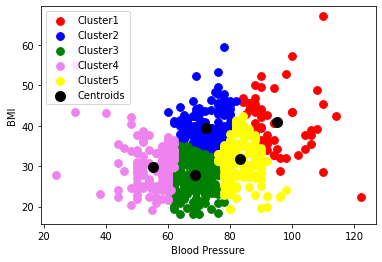

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.legend() 

plt.show()